# MONDAY, COVENANT IDORENYIN
# 23/EG/CO/030

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from missingno import missingno

Load dataset

In [97]:
df = pd.read_csv('dataset/wearable_health_devices_performance_upto_26june2025.csv')

1. 

In [98]:
df[['Test_Date', 'Device_Name', 'Brand', 'Category', 'Price_USD', 'User_Satisfaction_Rating']].head(4)

,Test_Date,Device_Name,Brand,Category,Price_USD,User_Satisfaction_Rating
0,2025-06-01,Fitbit Inspire 4,Fitbit,Fitness Tracker,141.74,6.5
1,2025-06-01,Apple Watch SE 3,Apple,Smartwatch,834.64,8.3
2,2025-06-01,Fitbit Versa 4,Fitbit,Sports Watch,145.34,6.0
3,2025-06-01,Polar Vantage V3,Polar,Smartwatch,349.53,8.0


2. 

In [99]:
df[['Test_Date', 'Device_Name', 'Brand', 'Category', 'Price_USD', 'User_Satisfaction_Rating']].tail(4)

,Test_Date,Device_Name,Brand,Category,Price_USD,User_Satisfaction_Rating
2371,2025-06-25,Fitbit Charge 6,Fitbit,Fitness Tracker,156.48,6.8
2372,2025-06-25,Apple Watch SE 3,Apple,Smartwatch,282.45,7.3
2373,2025-06-25,Apple Watch Ultra 2,Apple,Smartwatch,724.99,8.4
2374,2025-06-25,Amazfit GTS 4,Amazfit,Sports Watch,198.06,6.6


3. 

In [100]:
df[['Test_Date', 'Device_Name', 'Brand', 'Category', 'Price_USD', 'User_Satisfaction_Rating']].sample(4, random_state=30)

,Test_Date,Device_Name,Brand,Category,Price_USD,User_Satisfaction_Rating
2221,2025-06-24,Polar Vantage V3,Polar,Smartwatch,314.90,7.2
228,2025-06-03,Oura Ring Gen 4,Oura,Smart Ring,452.83,8.1
2074,2025-06-22,Samsung Galaxy Watch 7,Samsung,Smartwatch,587.17,8.9
872,2025-06-10,Apple Watch SE 3,Apple,Smartwatch,774.10,9.2


4. 

In [101]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
print(f"Total samples: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / (1024 * 1024):.2f} MB")

Total samples: 2375
Total columns: 17
Memory usage: 1.24 MB


5. 

In [102]:
print(f"Float64 columns: {len(df.select_dtypes(include='float64'))}")
print(f"Int64 columns: {len(df.select_dtypes(include='int64'))}")
print(f"Object columns: {len(df.select_dtypes(include='object'))}")

Float64 columns: 2375
Int64 columns: 2375
Object columns: 2375


6. 

In [103]:
df.describe(include='object')

,test_date,device_name,brand,model,category,water_resistance_rating,connectivity_features,app_ecosystem_support
count,2375,2375,2375,2375,2375,2375,2375,2375
unique,25,29,10,29,5,7,4,3
top,2025-06-21,Oura Ring Gen 4,Samsung,Ring Gen 4,Smartwatch,IPX8,Bluetooth,Cross-platform
freq,121,231,263,231,1230,649,906,1305


7. 

In [104]:
columns = ['test_date', 'device_name', 'brand', 'model', 'category',
        'water_resistance_rating', 'connectivity_features', 'app_ecosystem_support']
df[columns].describe()

,test_date,device_name,brand,model,category,water_resistance_rating,connectivity_features,app_ecosystem_support
count,2375,2375,2375,2375,2375,2375,2375,2375
unique,25,29,10,29,5,7,4,3
top,2025-06-21,Oura Ring Gen 4,Samsung,Ring Gen 4,Smartwatch,IPX8,Bluetooth,Cross-platform
freq,121,231,263,231,1230,649,906,1305


8. 

In [105]:
df['category'].value_counts()

category
Smartwatch         1230
Sports Watch        513
Fitness Band        231
Smart Ring          231
Fitness Tracker     170
Name: count, dtype: int64

9. 

In [106]:
df['brand'].value_counts()

brand
Samsung     263
Garmin      262
Apple       257
Polar       245
Fitbit      237
Amazfit     232
Oura        231
WHOOP       231
Withings    212
Huawei      205
Name: count, dtype: int64

DESCRIPTIVE STATISTICS

10. 

In [107]:
df.select_dtypes(include=['float64', 'int64']).mean()

price_usd                          359.444484
battery_life_hours                 160.584463
heart_rate_accuracy_percent         93.483907
step_count_accuracy_percent         95.910198
sleep_tracking_accuracy_percent     78.837516
user_satisfaction_rating             7.966484
gps_accuracy_meters                  3.247676
health_sensors_count                 8.912842
performance_score                   64.047621
dtype: float64

11. 

In [108]:
df.select_dtypes(include=['float64', 'int64']).std()

price_usd                          215.671035
battery_life_hours                 234.815896
heart_rate_accuracy_percent          3.172078
step_count_accuracy_percent          1.665484
sleep_tracking_accuracy_percent      4.843714
user_satisfaction_rating             0.831801
gps_accuracy_meters                  1.022825
health_sensors_count                 3.559990
performance_score                    5.109075
dtype: float64

12. 

In [109]:
df.select_dtypes(include=['float64', 'int64']).min()

price_usd                          30.00
battery_life_hours                 18.00
heart_rate_accuracy_percent        85.01
step_count_accuracy_percent        93.00
sleep_tracking_accuracy_percent    70.00
user_satisfaction_rating            6.00
gps_accuracy_meters                 1.50
health_sensors_count                2.00
performance_score                  55.10
dtype: float64

13. 

In [110]:
df.select_dtypes(include=['float64', 'int64']).max()

price_usd                           989.48
battery_life_hours                 2118.10
heart_rate_accuracy_percent          98.00
step_count_accuracy_percent          99.50
sleep_tracking_accuracy_percent      91.97
user_satisfaction_rating              9.50
gps_accuracy_meters                   5.00
health_sensors_count                 15.00
performance_score                    78.30
dtype: float64

14. 

In [111]:
df['price_usd'].median()

np.float64(334.37)

15. 

In [112]:
df['battery_life_hours'].quantile([0.25, 0.75])

0.25     46.9
0.75    177.4
Name: battery_life_hours, dtype: float64

16. 

In [113]:
df['heart_rate_accuracy_percent'].describe()

count    2375.000000
mean       93.483907
std         3.172078
min        85.010000
25%        92.140000
50%        94.070000
75%        95.925000
max        98.000000
Name: heart_rate_accuracy_percent, dtype: float64

17. 

In [114]:
df['step_count_accuracy_percent'].describe()

count    2375.000000
mean       95.910198
std         1.665484
min        93.000000
25%        94.550000
50%        95.950000
75%        96.960000
max        99.500000
Name: step_count_accuracy_percent, dtype: float64

18. 

In [115]:
df['sleep_tracking_accuracy_percent'].describe()

count    2375.000000
mean       78.837516
std         4.843714
min        70.000000
25%        75.610000
50%        78.300000
75%        81.930000
max        91.970000
Name: sleep_tracking_accuracy_percent, dtype: float64

19. 

In [116]:
df['performance_score'].describe()

count    2375.000000
mean       64.047621
std         5.109075
min        55.100000
25%        60.400000
50%        62.200000
75%        67.700000
max        78.300000
Name: performance_score, dtype: float64

CATEGORICAL FEATURE ANALYSIS

20. 

In [117]:
df['device_name'].nunique()

29

21. 

In [118]:
df['model'].nunique()

29

22. 

In [119]:
water_resistance_counts = df['water_resistance_rating'].value_counts()
print(f"Most frequent: {water_resistance_counts.idxmax()} (appears {water_resistance_counts.max()} times)")

Most frequent: IPX8 (appears 649 times)


23. 

In [120]:
connectivity_counts = df['connectivity_features'].value_counts()
print(f"Most frequent: {connectivity_counts.idxmax()} (appears {connectivity_counts.max()} times)")

Most frequent: Bluetooth (appears 906 times)


24. 

In [121]:
app_counts = df['app_ecosystem_support'].value_counts()
print(f"Most frequent: {app_counts.idxmax()} (appears {app_counts.max()} times)")

Most frequent: Cross-platform (appears 1305 times)


25. 

In [122]:
len(df[df['category'] == 'Smartwatch'])

1230

26. 

In [123]:
len(df[df['brand'] == 'Fitbit'])

237

27. 

In [124]:
len(df[df['connectivity_features'].str.contains('WiFi') & df['connectivity_features'].str.contains('Bluetooth') & df['connectivity_features'].str.contains('NFC') & df['connectivity_features'].str.contains('LTE')])

617

28. 

In [125]:
df[df['app_ecosystem_support'].str.contains('Cross-platform', na=False)][['device_name', 'app_ecosystem_support']]

,device_name,app_ecosystem_support
0,Fitbit Inspire 4,Cross-platform
2,Fitbit Versa 4,Cross-platform
3,Polar Vantage V3,Cross-platform
5,Garmin Forerunner 965,Cross-platform
6,Withings ScanWatch 2,Cross-platform
...,...,...
2365,Withings Steel HR,Cross-platform
2366,Garmin Enduro 3,Cross-platform
2367,Fitbit Sense 2,Cross-platform
2368,Withings ScanWatch 2,Cross-platform


29. 

In [126]:
df['test_date'].value_counts().sort_index()

test_date
2025-06-01     81
2025-06-02    104
2025-06-03     89
2025-06-04    101
2025-06-05    101
2025-06-06     91
2025-06-07     86
2025-06-08     96
2025-06-09     81
2025-06-10     94
2025-06-11     95
2025-06-12     85
2025-06-13    103
2025-06-14     92
2025-06-15    105
2025-06-16     78
2025-06-17     96
2025-06-18    103
2025-06-19     91
2025-06-20     93
2025-06-21    121
2025-06-22     96
2025-06-23     97
2025-06-24     97
2025-06-25     99
Name: count, dtype: int64

MISSING VALUES

30. 

In [127]:
df.isna().sum()[df.isna().sum() > 0]

gps_accuracy_meters    632
dtype: int64

31. 

In [128]:
df['gps_accuracy_meters'].isna().sum()

np.int64(632)

32. 

In [129]:
print(f"{df['gps_accuracy_meters'].isna().mean() * 100:.2f}% missing")

26.61% missing


33. 

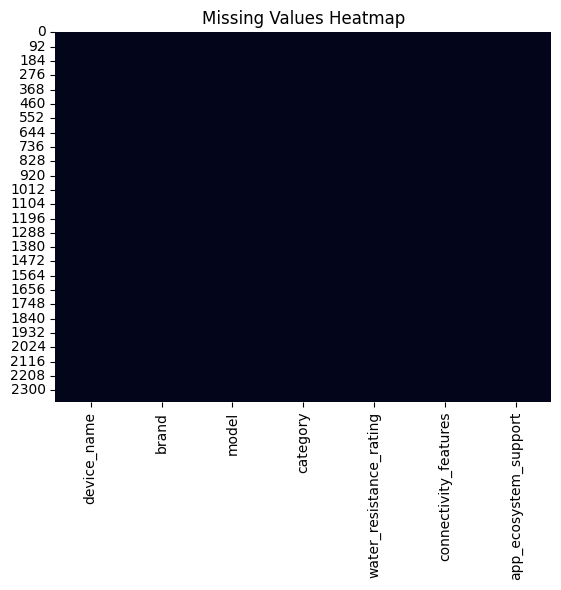

In [130]:
cols = ['device_name', 'brand', 'model', 'category',
        'water_resistance_rating', 'connectivity_features', 'app_ecosystem_support']
sns.heatmap(df[cols].isna(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

34. 

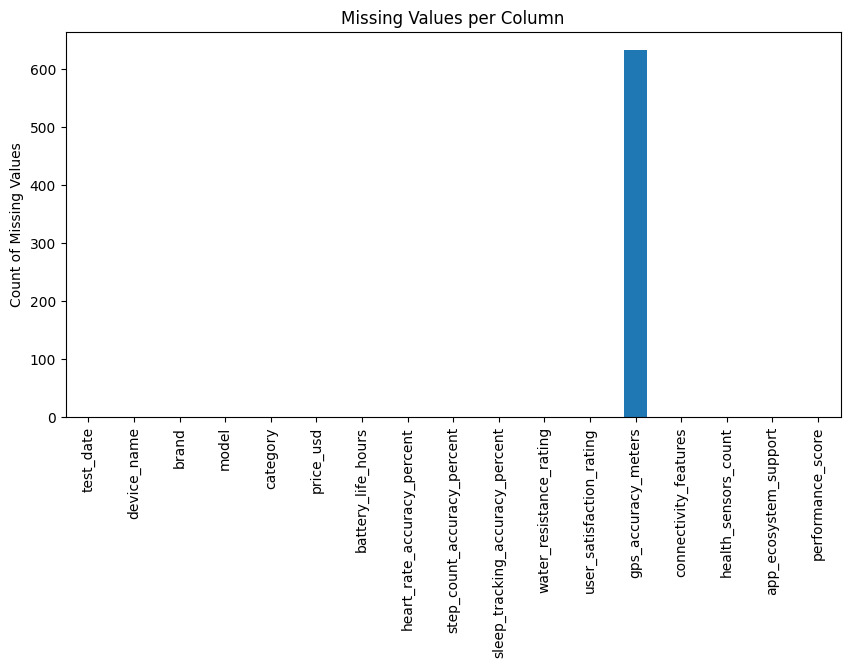

In [131]:
df.isna().sum().plot(kind='bar', figsize=(10, 5))
plt.title('Missing Values per Column')
plt.ylabel('Count of Missing Values')
plt.show()

35. 

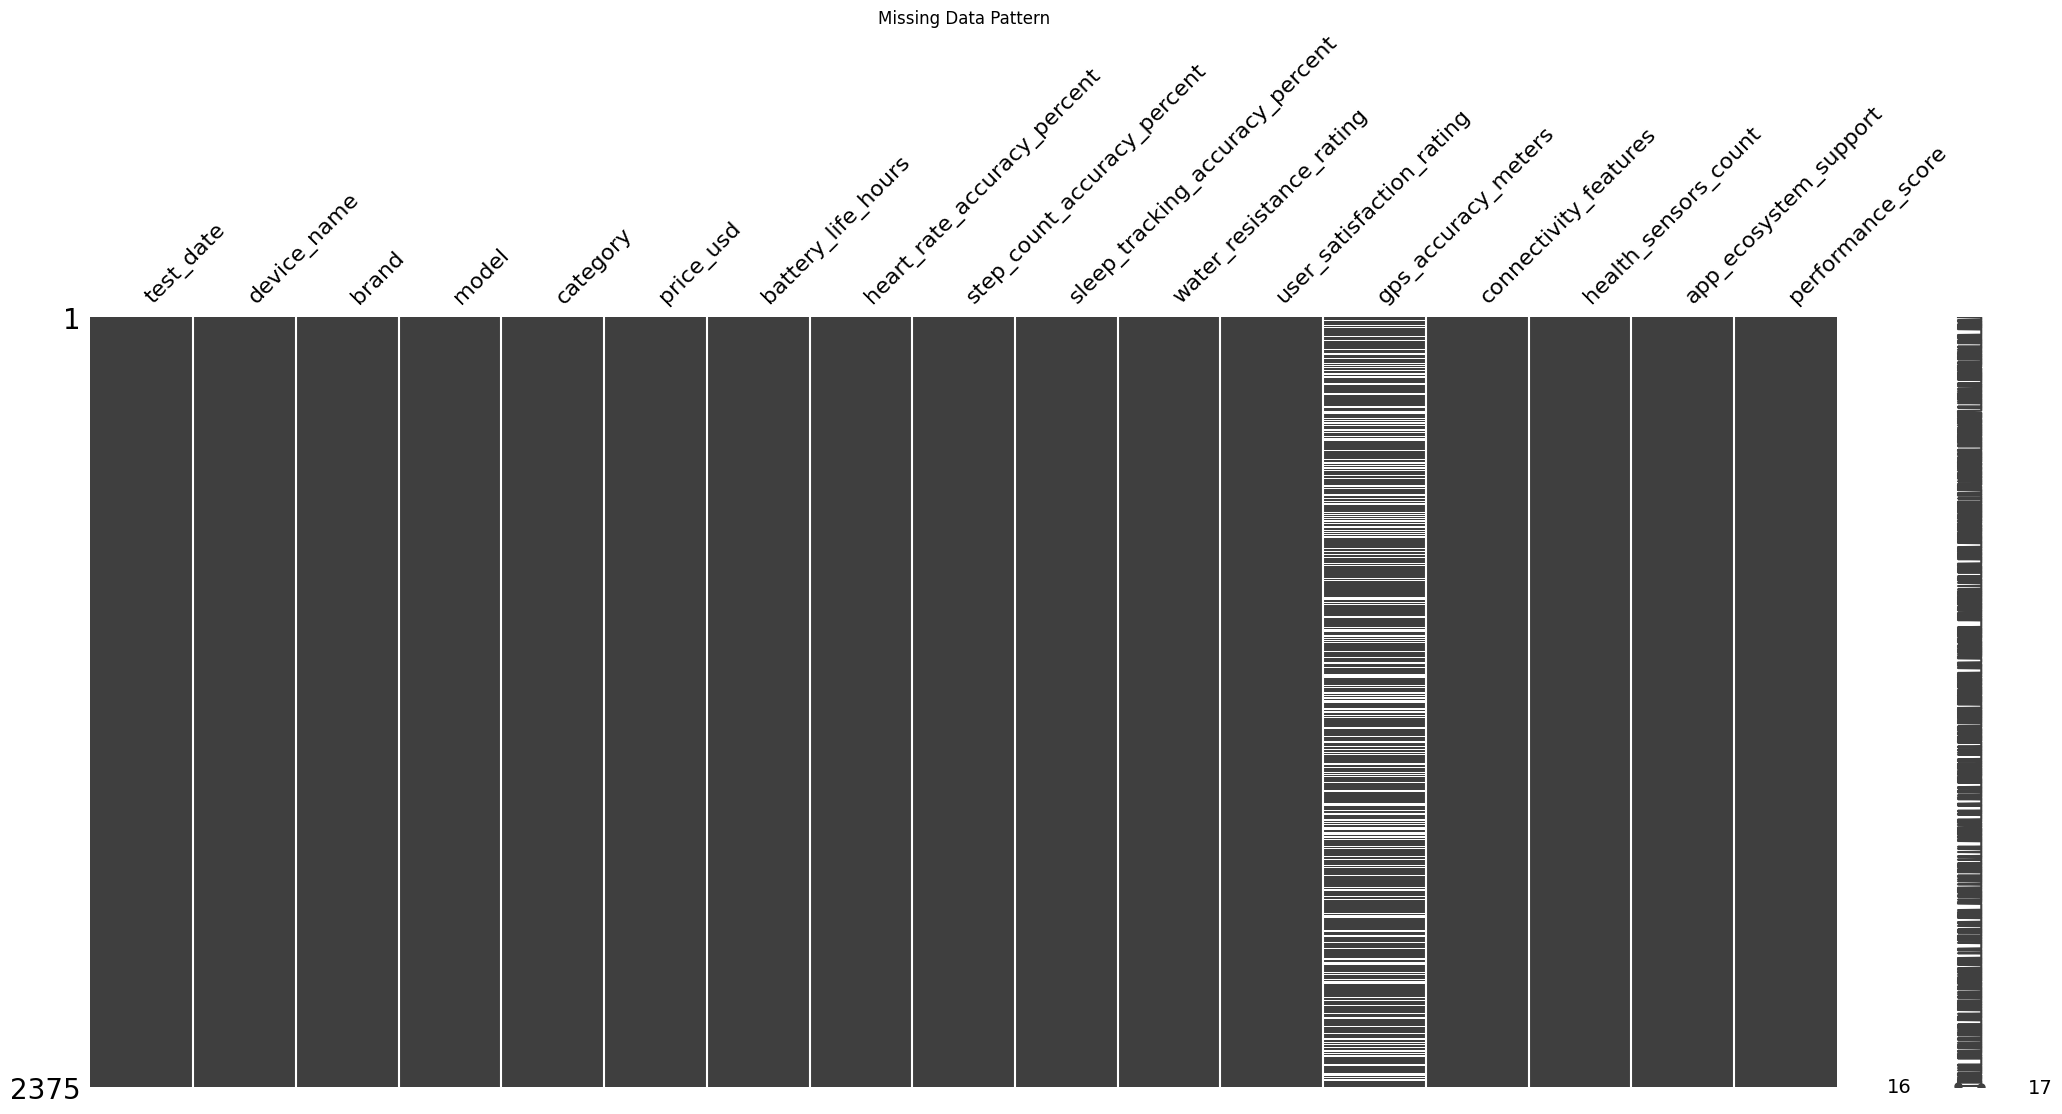

In [132]:
missingno.matrix(df)
plt.title('Missing Data Pattern')
plt.show()

36. 


For GPS_Accuracy_Meters, using median imputation would be appropriate because:
1. The data is likely skewed (many devices with similar accuracy, few outliers)
2. Median is robust to outliers
3. GPS accuracy is a technical specification that doesn't vary wildly within device categories

37. 

In [133]:
df['gps_accuracy_meters'].fillna(df['gps_accuracy_meters'].median(), inplace=True)

C:\Users\Governor\AppData\Local\Temp\ipykernel_3936\2891859055.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gps_accuracy_meters'].fillna(df['gps_accuracy_meters'].median(), inplace=True)


38.

Answer:
For User_Satisfaction_Rating, possible approaches:
1. If few missing values, remove those rows
2. If many missing, impute with median or mean (if normally distributed)
3. Or predict based on other features (Performance_Score, Price_USD, etc.)

39. 

In [134]:
df['gps_accuracy_meters'].isna().sum()

np.int64(0)

OUTLIER DETECTION AND HANDLING

40. 

In [135]:
Q1 = df['price_usd'].quantile(0.25)
Q3 = df['price_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['price_usd'] < lower_bound) | (df['price_usd'] > upper_bound)]['price_usd']
outliers

63      908.41
92      903.67
197     948.59
300     961.93
305     971.39
309     945.80
399     923.73
548     964.83
555     930.61
692     989.48
729     933.78
749     911.39
843     974.38
911     931.88
1074    956.74
1103    925.51
1181    919.95
1287    962.37
1317    934.12
1478    960.41
1521    928.79
1632    939.94
1713    977.73
1736    960.90
1925    914.20
1965    957.70
2006    962.55
2059    966.34
2152    971.28
2176    942.75
2187    933.02
2261    977.35
2358    917.50
Name: price_usd, dtype: float64

41. 

In [136]:
Q1 = df['battery_life_hours'].quantile(0.25)
Q3 = df['battery_life_hours'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['battery_life_hours'] < lower_bound) | (df['battery_life_hours'] > upper_bound)]['battery_life_hours']
outliers

7        589.9
17       459.6
25       644.7
29       512.5
33       537.9
         ...  
2288     461.8
2313     408.6
2358     612.8
2363     640.3
2366    2118.1
Name: battery_life_hours, Length: 199, dtype: float64

42. 

In [137]:
Q1 = df['heart_rate_accuracy_percent'].quantile(0.25)
Q3 = df['heart_rate_accuracy_percent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['heart_rate_accuracy_percent'] < lower_bound) | (df['heart_rate_accuracy_percent'] > upper_bound)]['heart_rate_accuracy_percent']
outliers

58      86.20
91      85.39
101     85.32
123     85.97
139     85.42
        ...  
2272    85.65
2277    85.02
2279    85.27
2307    85.80
2322    86.08
Name: heart_rate_accuracy_percent, Length: 87, dtype: float64

43. 

In [138]:
Q1 = df['step_count_accuracy_percent'].quantile(0.25)
Q3 = df['step_count_accuracy_percent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['step_count_accuracy_percent'] < lower_bound) | (df['step_count_accuracy_percent'] > upper_bound)]['step_count_accuracy_percent']
outliers

Series([], Name: step_count_accuracy_percent, dtype: float64)

44. 

In [139]:
Q1 = df['sleep_tracking_accuracy_percent'].quantile(0.25)
Q3 = df['sleep_tracking_accuracy_percent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['sleep_tracking_accuracy_percent'] < lower_bound) | (df['sleep_tracking_accuracy_percent'] > upper_bound)]['sleep_tracking_accuracy_percent']
outliers

24      91.48
398     91.73
589     91.60
609     91.71
654     91.97
688     91.93
761     91.60
919     91.97
1116    91.64
1404    91.48
1421    91.73
1449    91.94
1573    91.84
1582    91.60
1684    91.48
1692    91.56
1865    91.95
2048    91.66
2072    91.79
2116    91.80
2265    91.89
Name: sleep_tracking_accuracy_percent, dtype: float64

45. 

In [140]:
Q1 = df['performance_score'].quantile(0.25)
Q3 = df['performance_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['performance_score'] < lower_bound) | (df['performance_score'] > upper_bound)]['performance_score']
outliers

Series([], Name: performance_score, dtype: float64)

46. 

In [141]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df = remove_outliers(df, col)

47. 

In [142]:
len(df)

2125

48. 

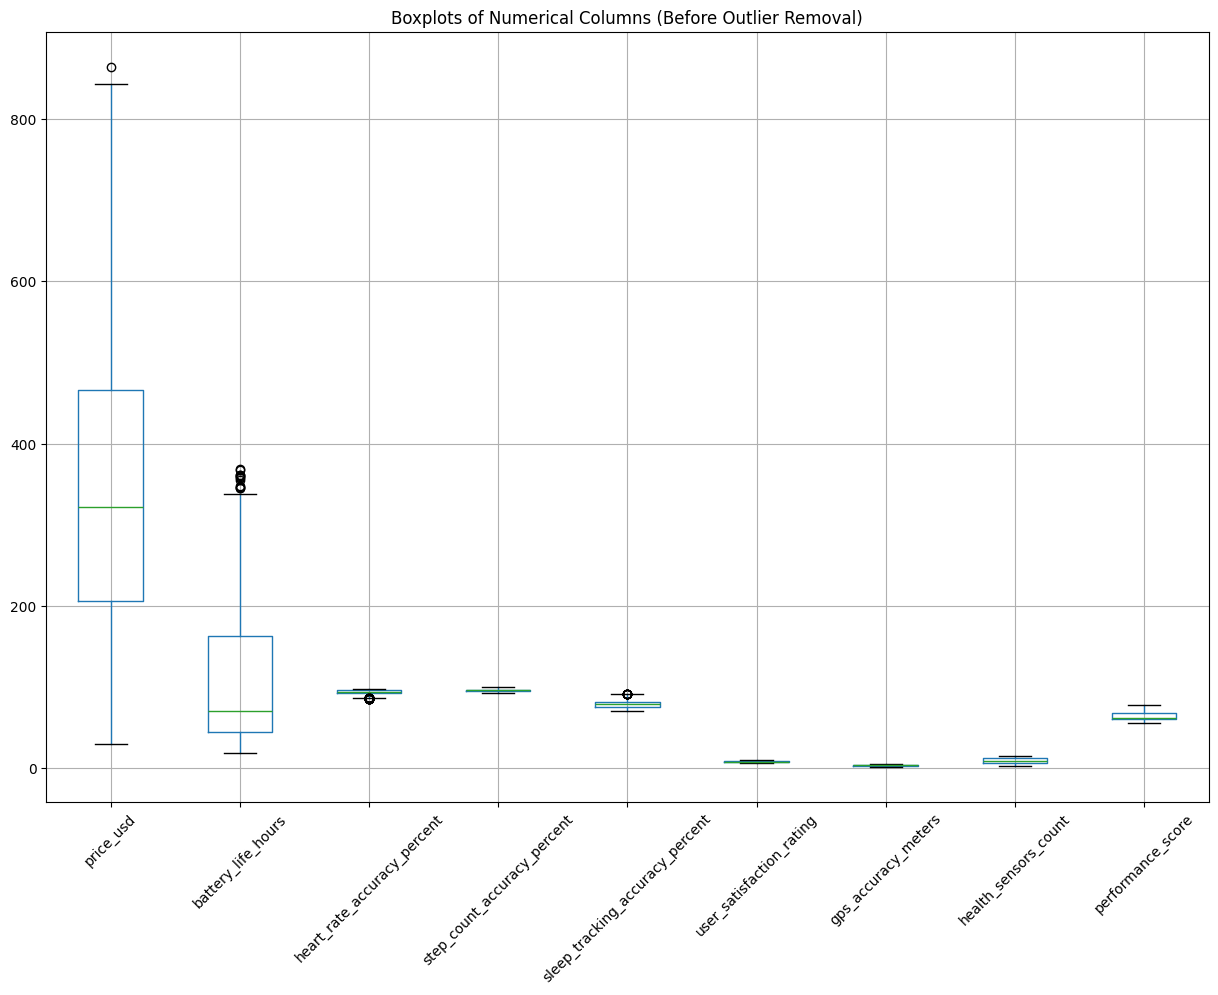

In [143]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
df[numerical_cols].boxplot()
plt.title('Boxplots of Numerical Columns (Before Outlier Removal)')
plt.xticks(rotation=45)
plt.show()

49. 

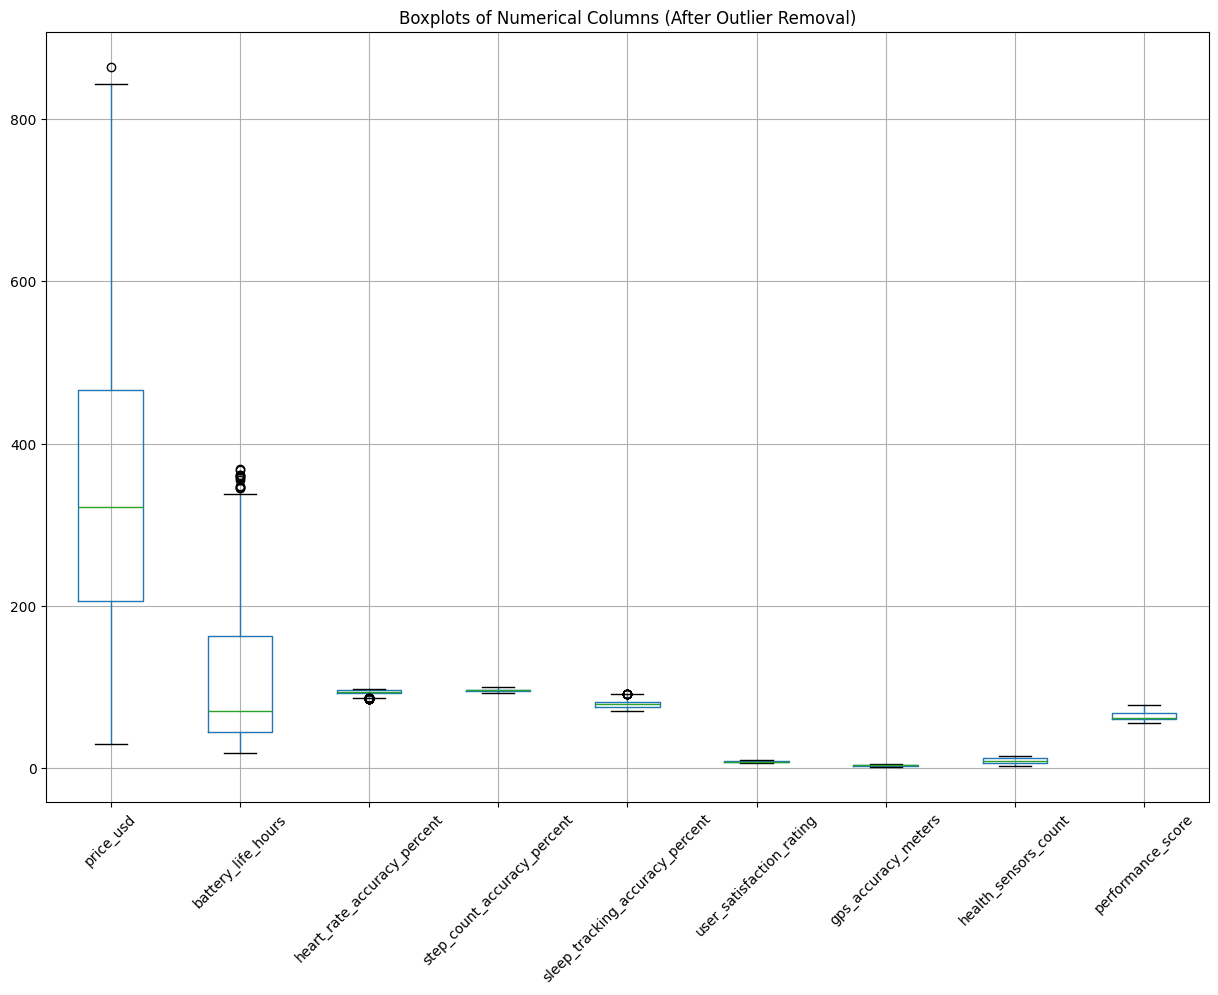

In [144]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
df[numerical_cols].boxplot()
plt.title('Boxplots of Numerical Columns (After Outlier Removal)')
plt.xticks(rotation=45)
plt.show()

VISUALIZATION

50. 

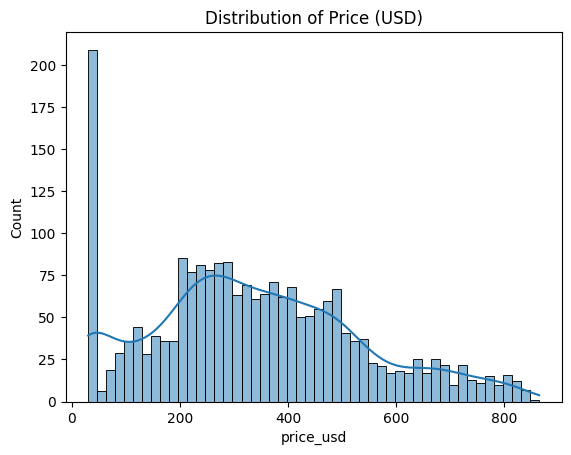

In [145]:
sns.histplot(df['price_usd'], bins=50, kde=True)
plt.title('Distribution of Price (USD)')
plt.show()

51. 

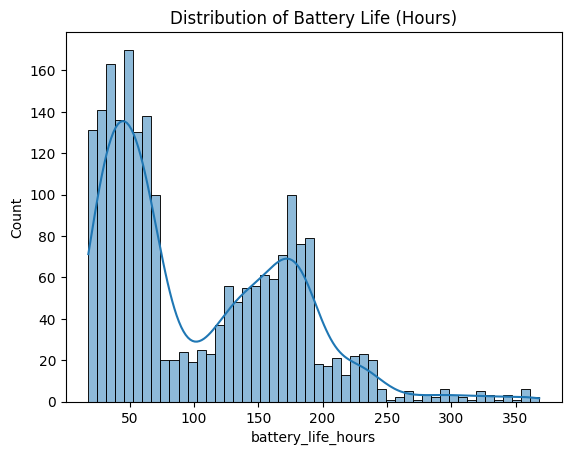

In [146]:
sns.histplot(df['battery_life_hours'], bins=50, kde=True)
plt.title('Distribution of Battery Life (Hours)')
plt.show()

52. 

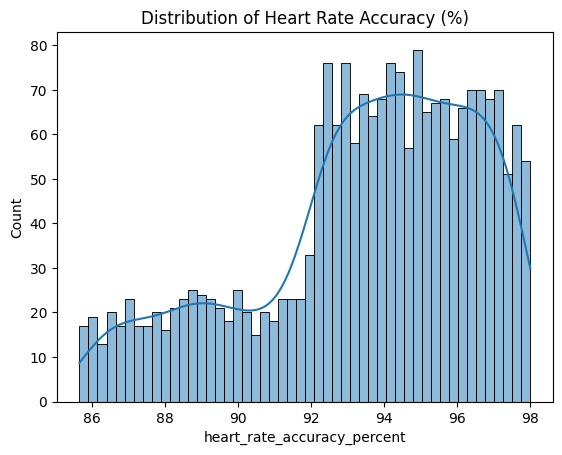

In [147]:
sns.histplot(df['heart_rate_accuracy_percent'], bins=50, kde=True)
plt.title('Distribution of Heart Rate Accuracy (%)')
plt.show()

53. 

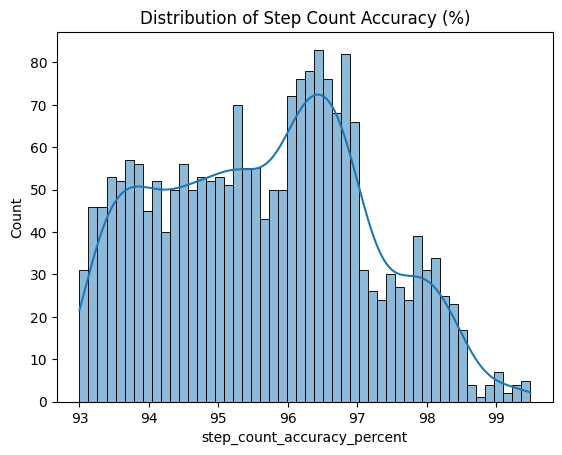

In [148]:
sns.histplot(df['step_count_accuracy_percent'], bins=50, kde=True)
plt.title('Distribution of Step Count Accuracy (%)')
plt.show()

54. 

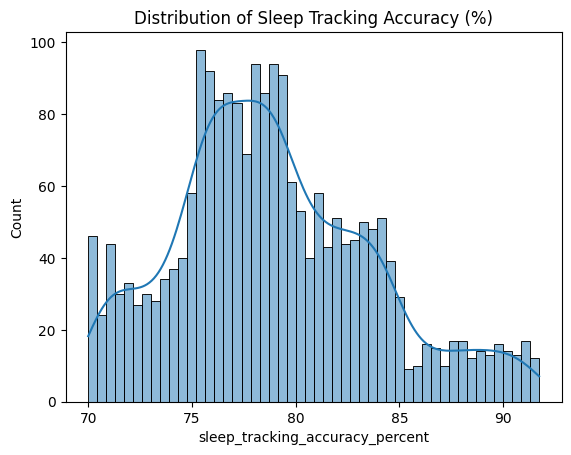

In [149]:
sns.histplot(df['sleep_tracking_accuracy_percent'], bins=50, kde=True)
plt.title('Distribution of Sleep Tracking Accuracy (%)')
plt.show()

55. 

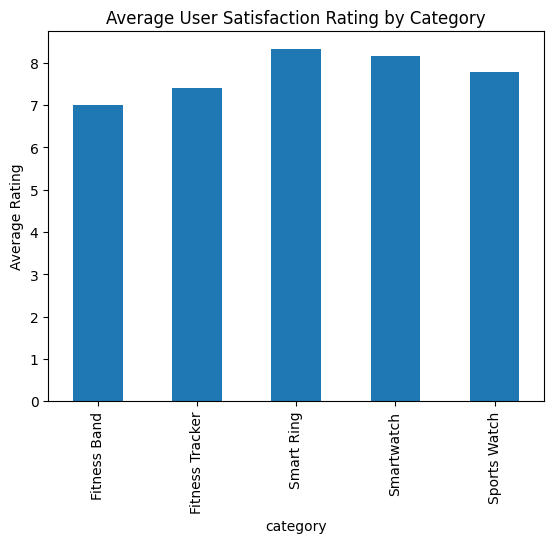

In [150]:
df.groupby('category')['user_satisfaction_rating'].mean().plot(kind='bar')
plt.title('Average User Satisfaction Rating by Category')
plt.ylabel('Average Rating')
plt.show()

56. 

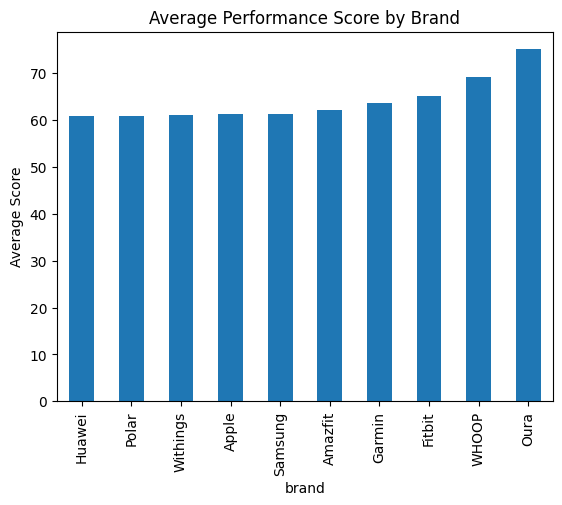

In [151]:
df.groupby('brand')['performance_score'].mean().sort_values().plot(kind='bar')
plt.title('Average Performance Score by Brand')
plt.ylabel('Average Score')
plt.show()

57. 

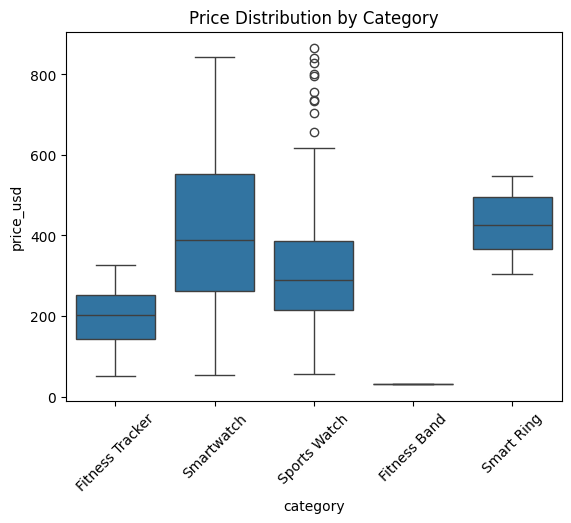

In [152]:
sns.boxplot(x='category', y='price_usd', data=df)
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

58. 

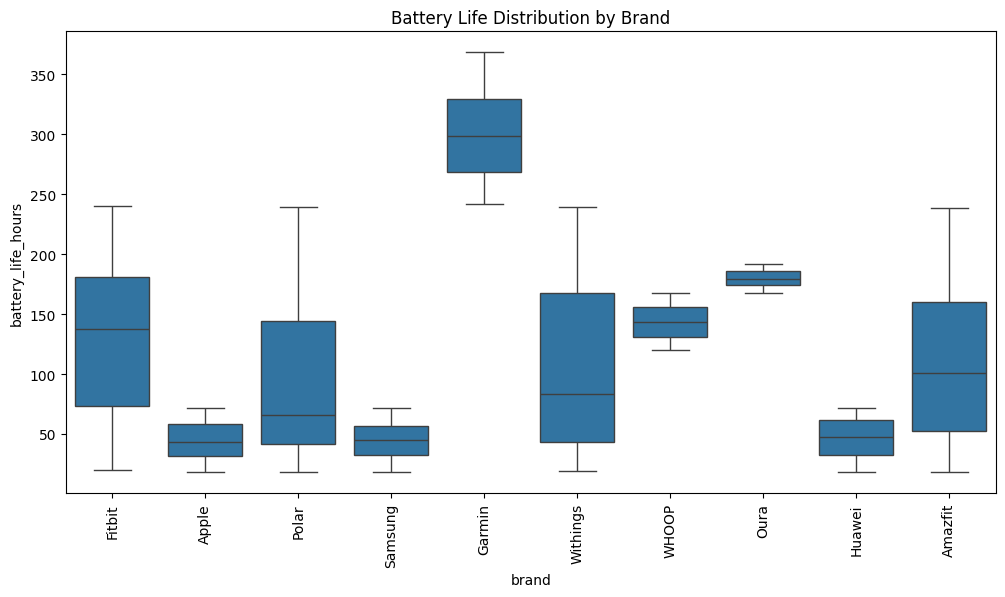

In [153]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='battery_life_hours', data=df)
plt.title('Battery Life Distribution by Brand')
plt.xticks(rotation=90)
plt.show()

59. 

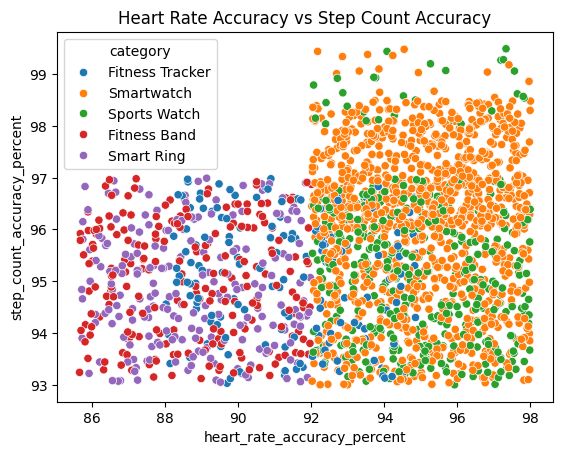

In [154]:
sns.scatterplot(x='heart_rate_accuracy_percent', y='step_count_accuracy_percent', hue='category', data=df)
plt.title('Heart Rate Accuracy vs Step Count Accuracy')
plt.show()

CATEGORICAL ANALYSIS

60. 

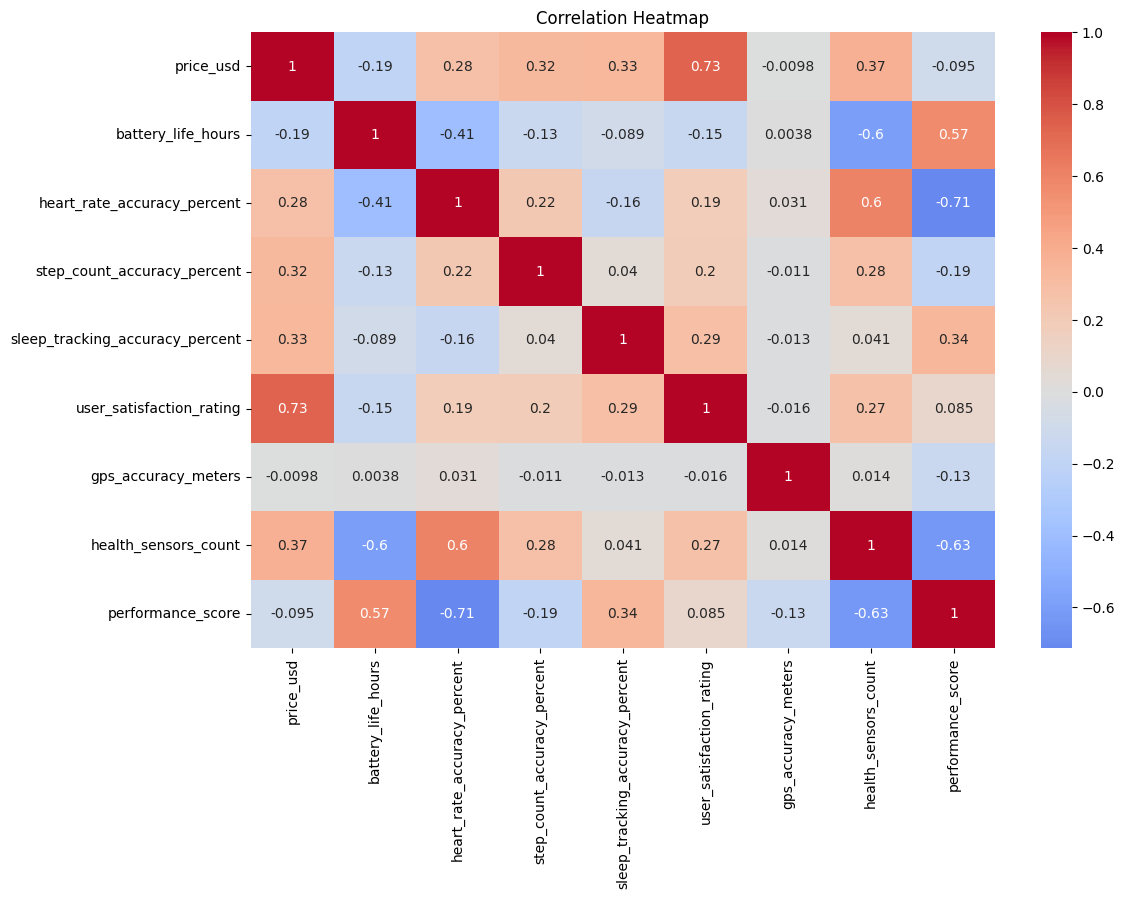

In [155]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

61. 

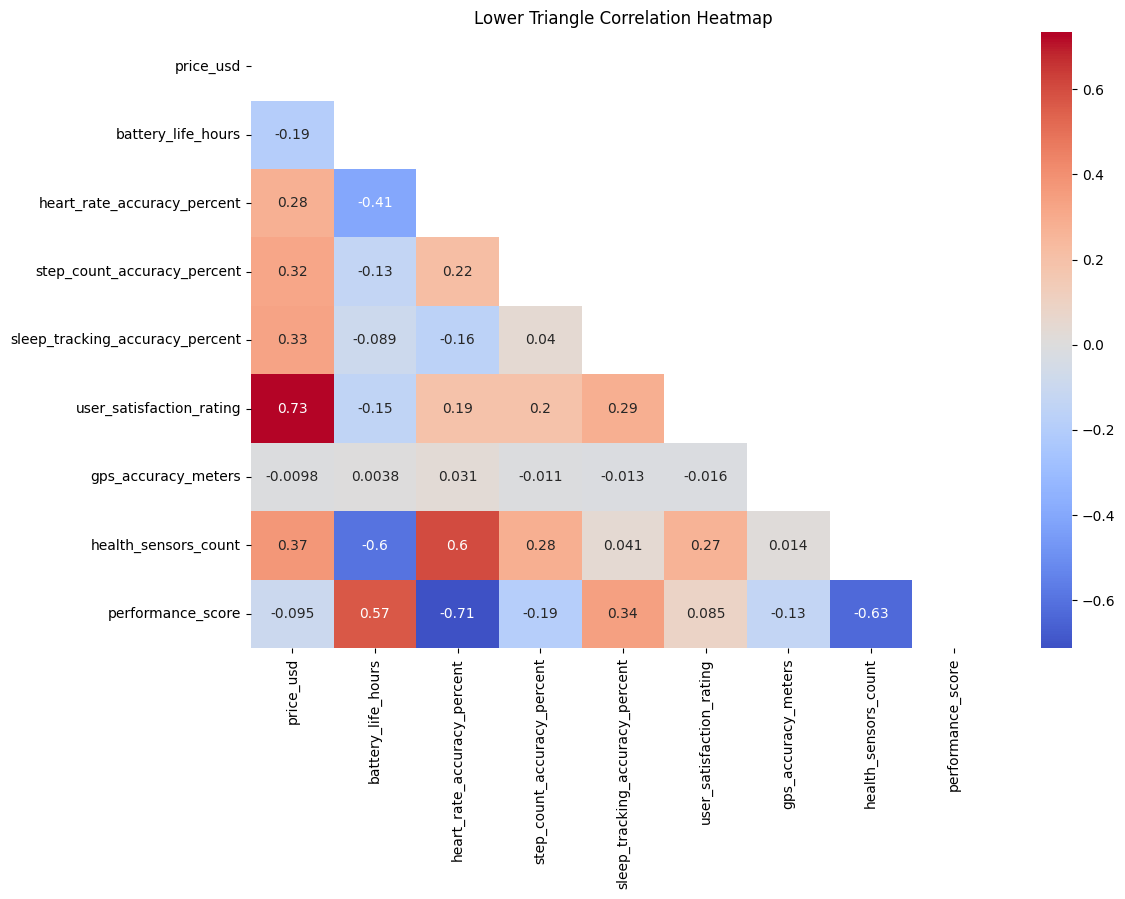

In [156]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0)
plt.title('Lower Triangle Correlation Heatmap')
plt.show()

62. 

In [157]:
df[['heart_rate_accuracy_percent', 'step_count_accuracy_percent']].corr().iloc[0,1]

np.float64(0.2178392903918647)

63. 

In [158]:
df[['price_usd', 'performance_score']].corr().iloc[0,1]

np.float64(-0.09513345999427167)

64. 

In [159]:
df[['battery_life_hours', 'user_satisfaction_rating']].corr().iloc[0,1]

np.float64(-0.14685128483970866)

65. 

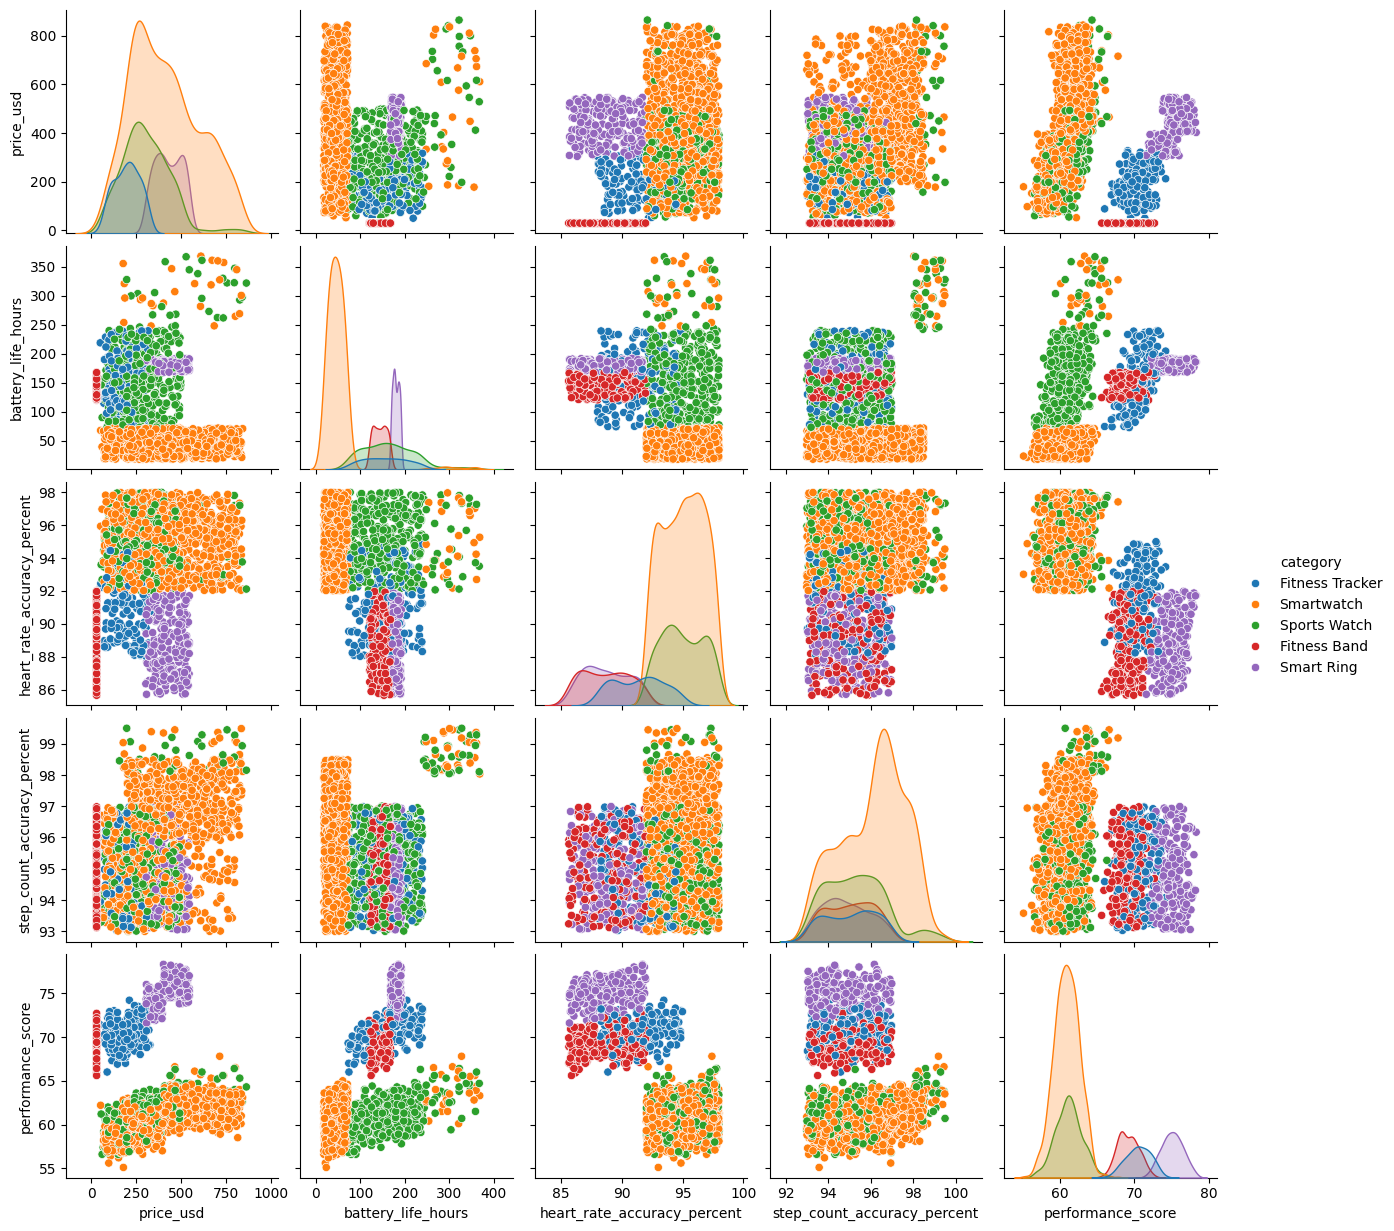

In [160]:
sns.pairplot(df, vars=['price_usd', 'battery_life_hours', 'heart_rate_accuracy_percent',
                   'step_count_accuracy_percent', 'performance_score'], hue='category')
plt.show()

66. 

In [161]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
corr['performance_score'].sort_values(ascending=False).head(6)

performance_score                  1.000000
battery_life_hours                 0.566388
sleep_tracking_accuracy_percent    0.339228
user_satisfaction_rating           0.084855
price_usd                         -0.095133
gps_accuracy_meters               -0.134684
Name: performance_score, dtype: float64

67. 

In [162]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
corr['user_satisfaction_rating'].sort_values().head(5)

battery_life_hours            -0.146851
gps_accuracy_meters           -0.016222
performance_score              0.084855
heart_rate_accuracy_percent    0.185913
step_count_accuracy_percent    0.195186
Name: user_satisfaction_rating, dtype: float64

68. 

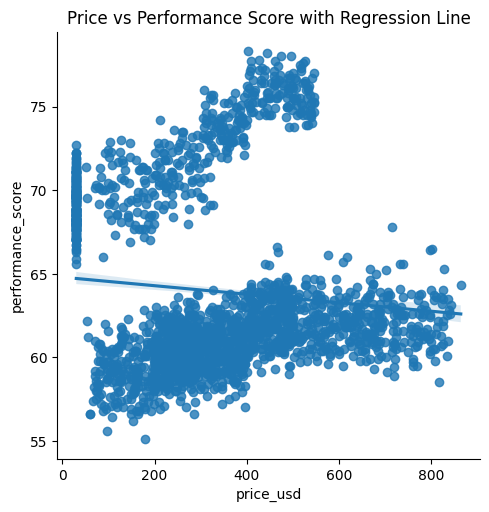

In [163]:
sns.lmplot(x='price_usd', y='performance_score', data=df)
plt.title('Price vs Performance Score with Regression Line')
plt.show()

69. 

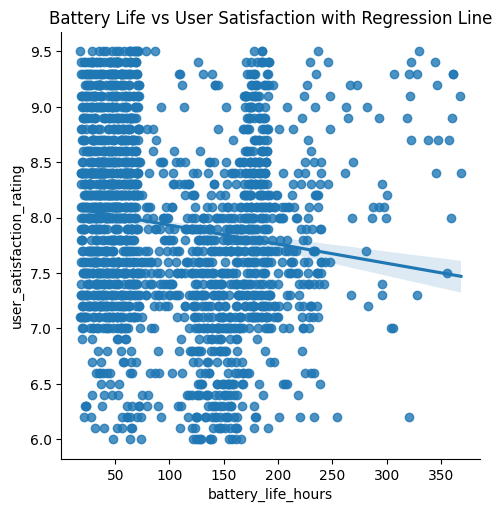

In [164]:
sns.lmplot(x='battery_life_hours', y='user_satisfaction_rating', data=df)
plt.title('Battery Life vs User Satisfaction with Regression Line')
plt.show()

GROUPING AND AGGREGATION

70. 

In [165]:
df.groupby('category')['price_usd'].mean()

category
Fitness Band        30.000000
Fitness Tracker    197.510294
Smart Ring         429.170521
Smartwatch         412.809716
Sports Watch       305.615707
Name: price_usd, dtype: float64

71. 

In [166]:
df.groupby('brand')['battery_life_hours'].mean()

brand
Amazfit     110.722845
Apple        44.001946
Fitbit      132.640084
Garmin      302.616667
Huawei       46.591220
Oura        179.859716
Polar        93.729796
Samsung      44.885171
WHOOP       143.840670
Withings    104.575943
Name: battery_life_hours, dtype: float64

72. 

In [167]:
df.groupby('water_resistance_rating')['user_satisfaction_rating'].mean()

water_resistance_rating
10ATM    7.850000
3ATM     7.251351
5ATM     8.046200
IP68     8.094497
IPX4     7.191333
IPX7     7.748523
IPX8     8.058361
Name: user_satisfaction_rating, dtype: float64

73. 

In [168]:
df.groupby('app_ecosystem_support')['performance_score'].max()

app_ecosystem_support
Android/iOS       78.0
Cross-platform    78.3
iOS               64.4
Name: performance_score, dtype: float64

74. 

In [169]:
df.groupby('category')['heart_rate_accuracy_percent'].min()

category
Fitness Band       85.65
Fitness Tracker    88.02
Smart Ring         85.71
Smartwatch         92.01
Sports Watch       92.03
Name: heart_rate_accuracy_percent, dtype: float64

75. 

In [170]:
df.groupby('brand')['step_count_accuracy_percent'].mean()

brand
Amazfit     94.938491
Apple       97.283930
Fitbit      95.090211
Garmin      98.681481
Huawei      95.011220
Oura        94.842464
Polar       95.137918
Samsung     97.175323
WHOOP       95.037560
Withings    95.040047
Name: step_count_accuracy_percent, dtype: float64

76. 

In [171]:
df.groupby('category')['sleep_tracking_accuracy_percent'].median()

category
Fitness Band       75.13
Fitness Tracker    75.46
Smart Ring         88.48
Smartwatch         79.77
Sports Watch       74.89
Name: sleep_tracking_accuracy_percent, dtype: float64

77. 

In [172]:
df.groupby('connectivity_features').size()

connectivity_features
Bluetooth                    801
Bluetooth, WiFi              199
WiFi, Bluetooth, NFC         562
WiFi, Bluetooth, NFC, LTE    563
dtype: int64

78. 

In [173]:
df.groupby('app_ecosystem_support')['price_usd'].mean()

app_ecosystem_support
Android/iOS       339.368144
Cross-platform    294.054786
iOS               525.029494
Name: price_usd, dtype: float64

79. 

In [174]:
df.groupby('water_resistance_rating')['battery_life_hours'].std()

water_resistance_rating
10ATM    13.081475
3ATM     34.565689
5ATM     72.076719
IP68     64.906058
IPX4     33.899744
IPX7     28.702261
IPX8     73.325829
Name: battery_life_hours, dtype: float64

ADVANCED ANALYSIS

80. 

In [175]:
df.duplicated().sum()

np.int64(0)

81. 

In [176]:
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Removed {duplicates} duplicate rows")

Removed 0 duplicate rows


82. 

In [177]:
df[df['water_resistance_rating'] == 'SATM']['performance_score'].mean()

nan

83. 

In [178]:
df[df['connectivity_features'].str.contains('Bluetooth', na=False)]['user_satisfaction_rating'].mean()

np.float64(7.926352941176471)

84. 

In [179]:
brand_avg = df.groupby('brand')['heart_rate_accuracy_percent'].mean()
brand_avg.idxmax()

'Withings'

85. 

In [180]:
category_avg = df.groupby('category')['price_usd'].mean()
category_avg.idxmin()

'Fitness Band'

86. 

In [181]:
pd.pivot_table(df, values='performance_score', index='brand', columns='category', aggfunc='mean')

category,Fitness Band,Fitness Tracker,Smart Ring,Smartwatch,Sports Watch
brand,,,,,
Amazfit,NaN,70.264815,NaN,59.357647,60.109677
Apple,NaN,NaN,NaN,61.366926,NaN
Fitbit,NaN,70.634483,NaN,59.327586,60.344444
Garmin,NaN,NaN,NaN,63.788000,63.475862
Huawei,NaN,NaN,NaN,60.827805,NaN
Oura,NaN,NaN,75.063981,NaN,NaN
Polar,NaN,NaN,NaN,60.434586,61.521429
Samsung,NaN,NaN,NaN,61.374905,NaN
WHOOP,69.14067,NaN,NaN,NaN,NaN


87. 

In [182]:
pd.pivot_table(df, values='device_name', index='water_resistance_rating', columns='app_ecosystem_support', aggfunc='count')

app_ecosystem_support,Android/iOS,Cross-platform,iOS
water_resistance_rating,,,
10ATM,NaN,2.0,NaN
3ATM,36.0,75.0,NaN
5ATM,167.0,243.0,90.0
IP68,192.0,243.0,92.0
IPX4,58.0,92.0,NaN
IPX7,96.0,141.0,NaN
IPX8,243.0,280.0,75.0


88. 

In [183]:
df[df['health_sensors_count'] > 8]['gps_accuracy_meters'].mean()

np.float64(3.2393034825870646)

89. 

In [184]:
len(df[df['user_satisfaction_rating'] > 9.0])

238

90. 

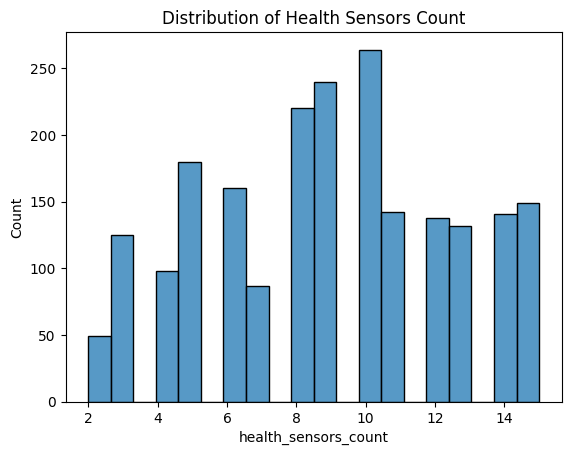

In [185]:
sns.histplot(df['health_sensors_count'], bins=20)
plt.title('Distribution of Health Sensors Count')
plt.show()

91. 

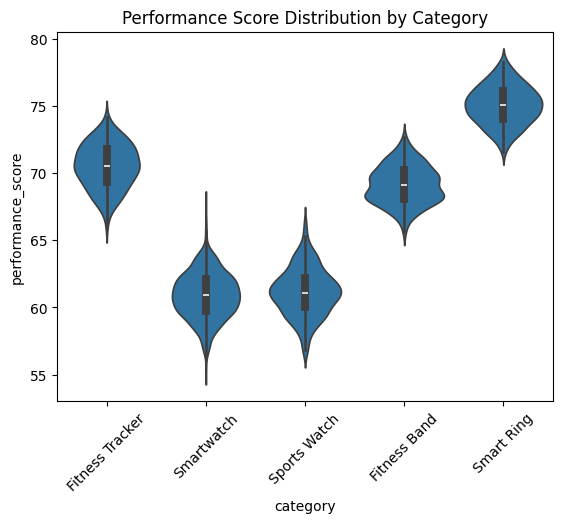

In [186]:
sns.violinplot(x='category', y='performance_score', data=df)
plt.title('Performance Score Distribution by Category')
plt.xticks(rotation=45)
plt.show()